In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Load the imputed dataset
data = pd.read_csv("E:/AI engineer/Guvi/Capstone Projects/Project3/SmartPremium/data/train.csv")

# Display the first few rows
data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [42]:
data['Previous Claims'].value_counts()

Previous Claims
0.0    305433
1.0    300811
2.0    167661
3.0     49011
4.0     10668
5.0      2018
6.0       302
7.0        58
8.0         8
9.0         1
Name: count, dtype: int64

In [31]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [32]:
data.drop('Policy Start Date',axis=1,inplace=True)

In [33]:
numerical_features,categorical_features=[],[]
for i in data.columns.to_list():
      if data[i].dtype == 'object':
        categorical_features.append(i)
      else:
        numerical_features.append(i)

print("===========")
print("Numerical columns List:- ",numerical_features,len(numerical_features),sep="\n")
print("===========")
print("Categorical columns List:- ",categorical_features,len(categorical_features),sep="\n")


Numerical columns List:- 
['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Premium Amount']
10
Categorical columns List:- 
['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']
10


In [34]:
for i in ['Previous Claims','Number of Dependents','Insurance Duration','Vehicle Age']:
    numerical_features.remove(i)
    categorical_features.append(i)

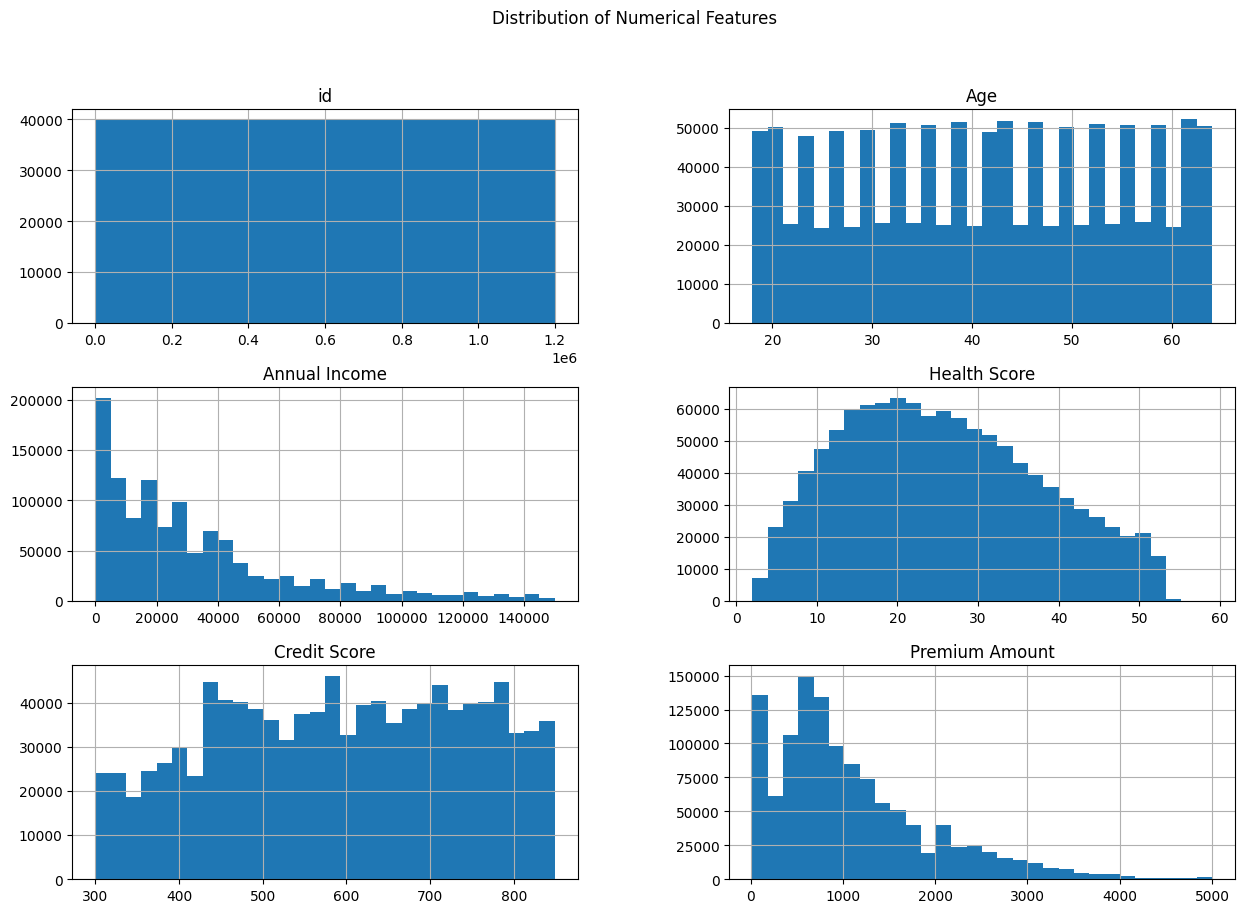

In [41]:
# Plot histograms for numerical features
data[numerical_features].hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features")
plt.show()

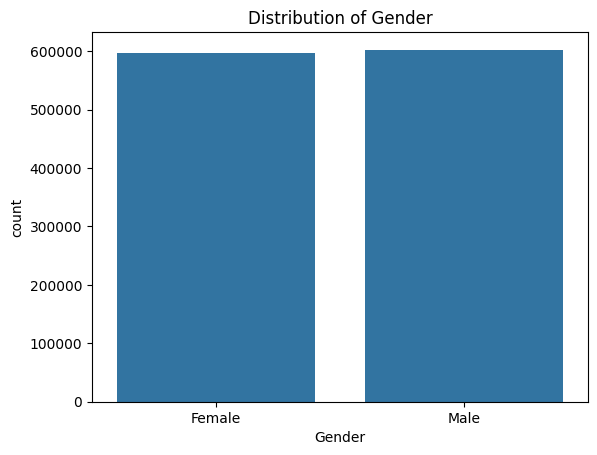

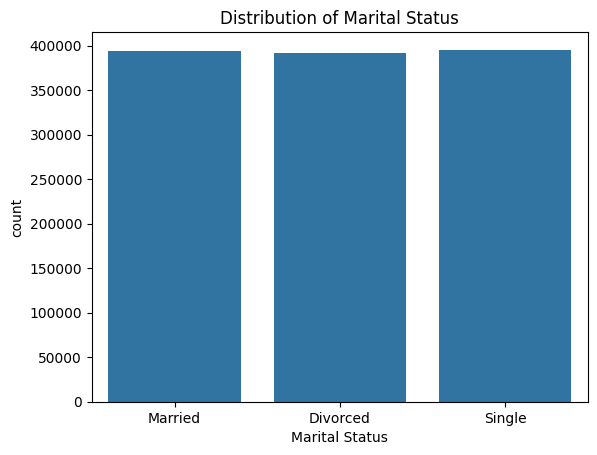

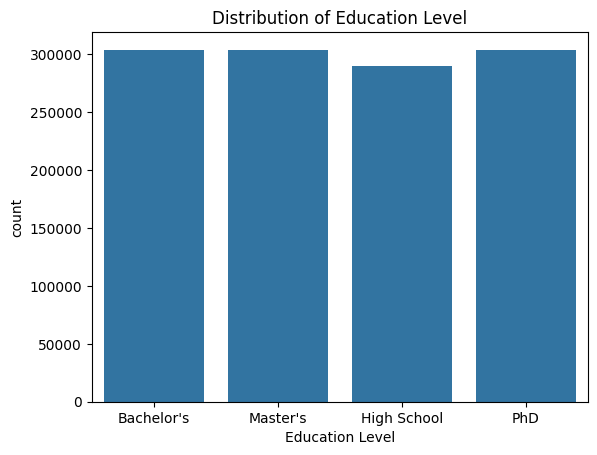

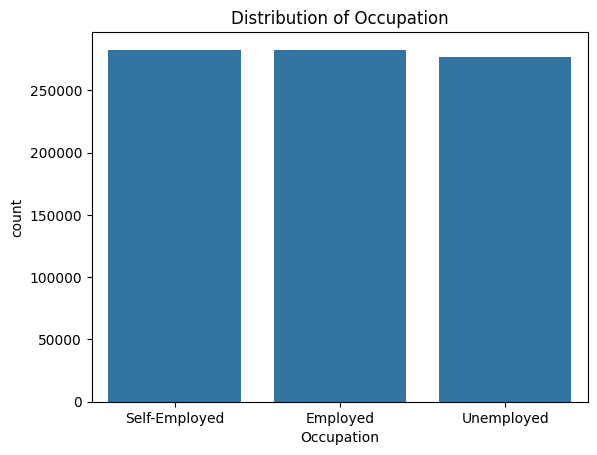

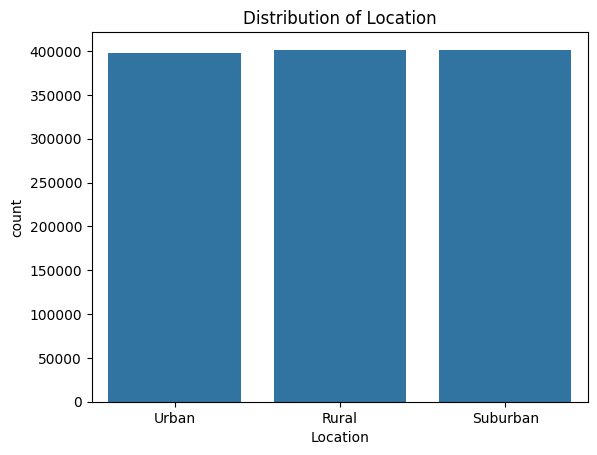

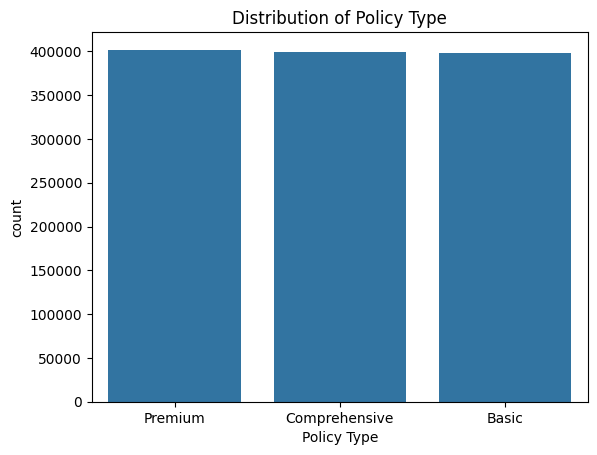

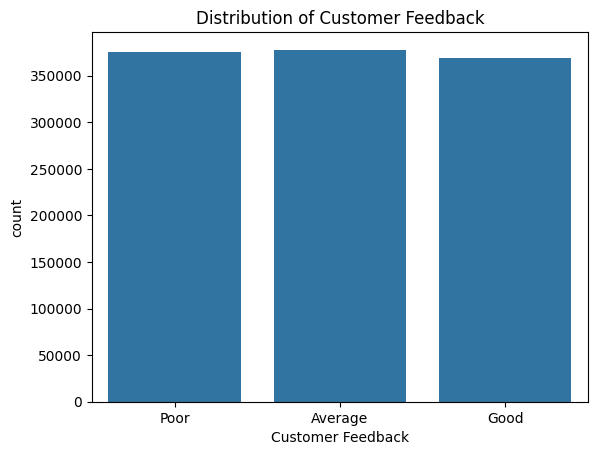

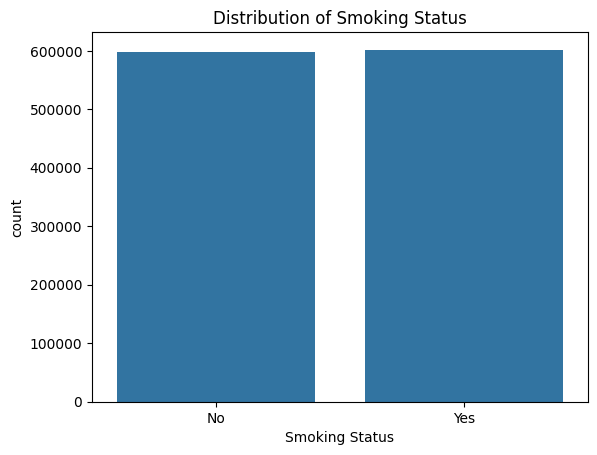

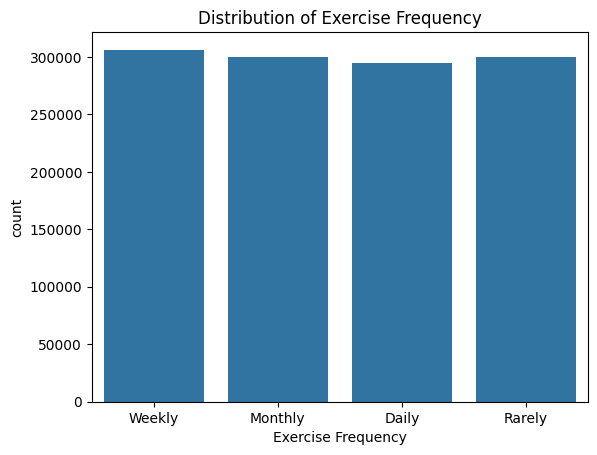

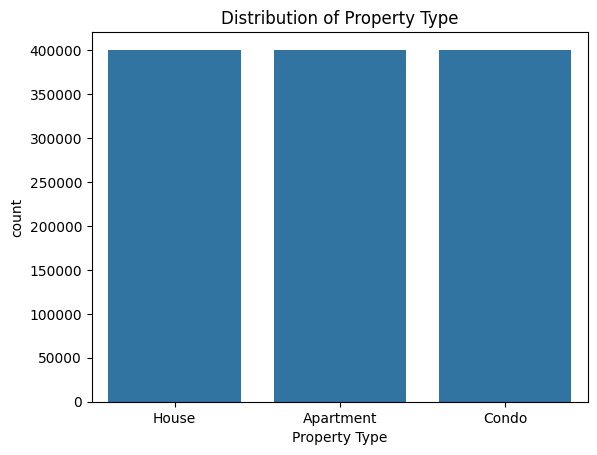

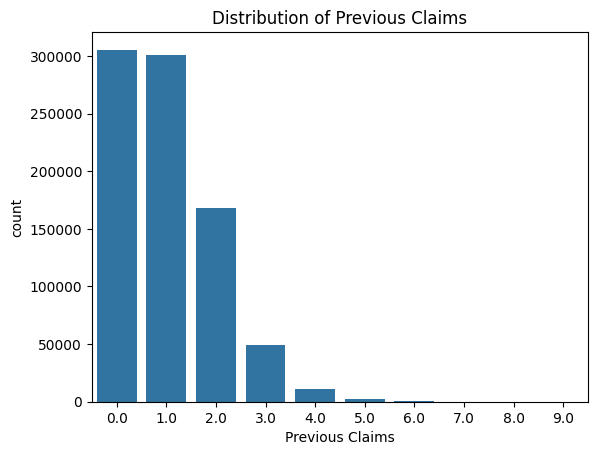

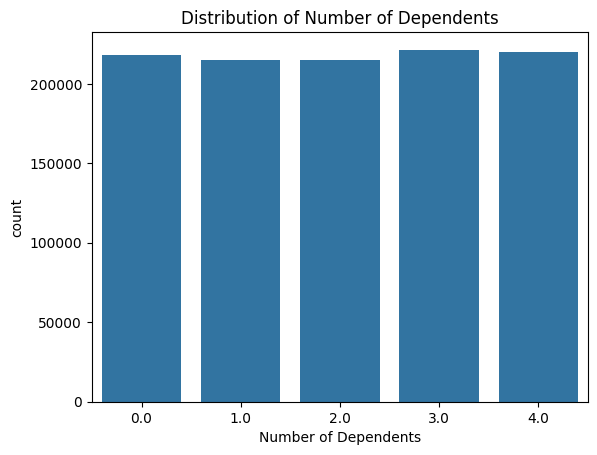

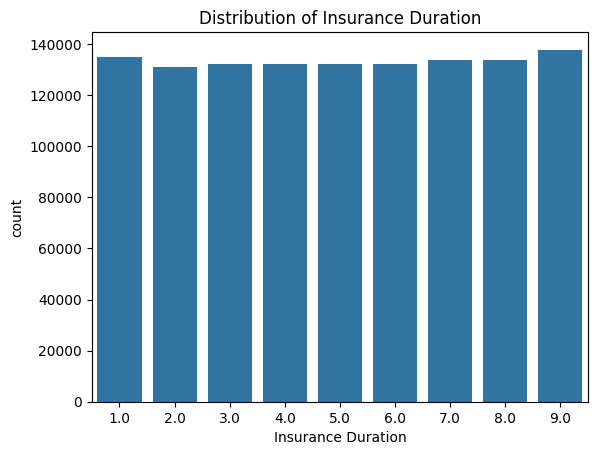

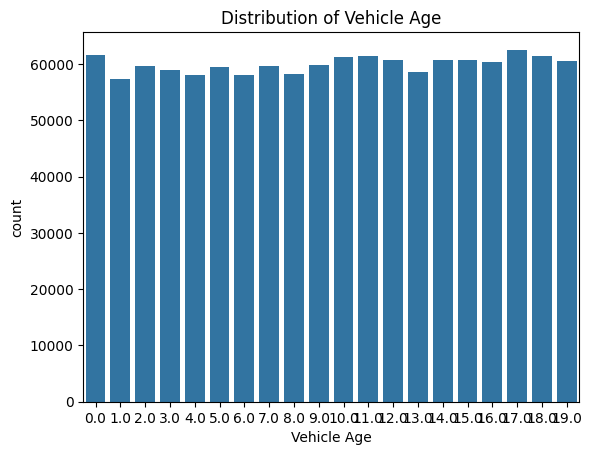

In [36]:
for feature in categorical_features:
    sns.countplot(x=feature, data=data)
    plt.title(f"Distribution of {feature}")
    plt.show()

#### Outliers

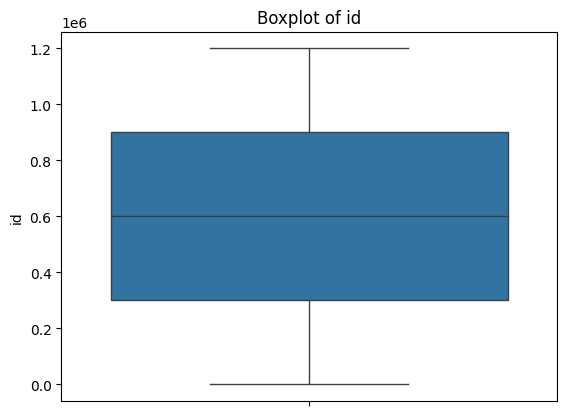

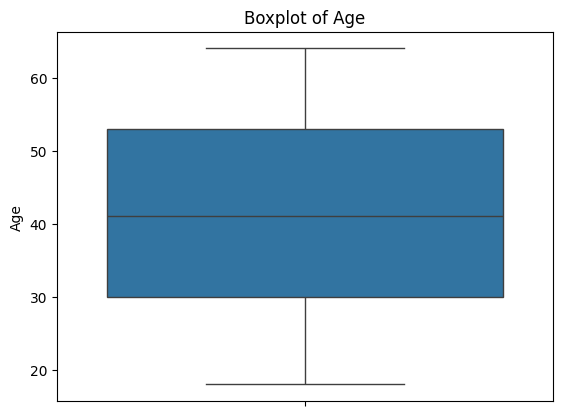

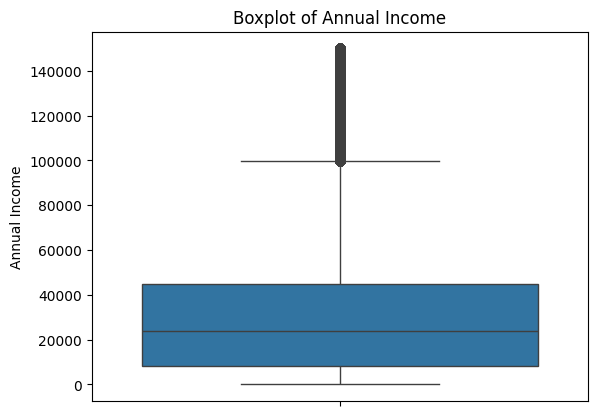

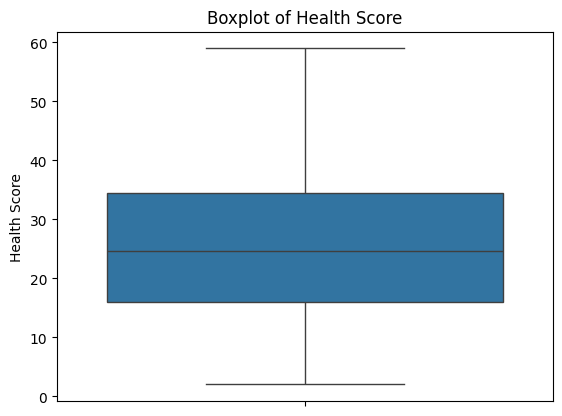

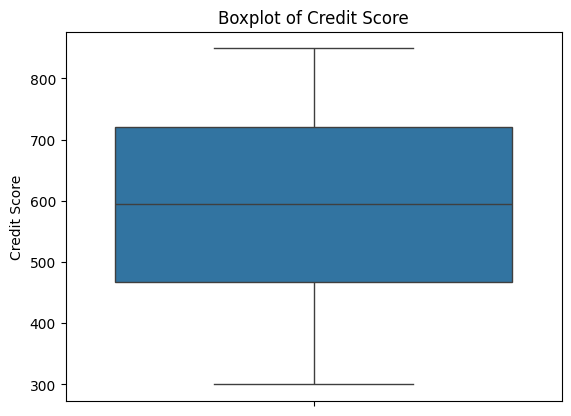

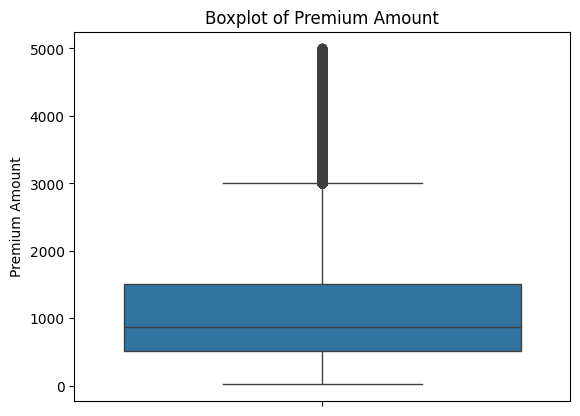

In [37]:
for feature in numerical_features:
    sns.boxplot(y=data[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()

#### Correlations

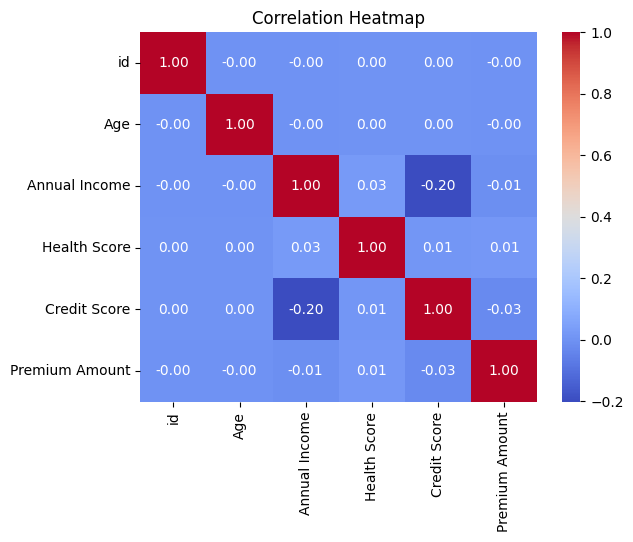

In [44]:
corr_matrix = data[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

#### Target variable

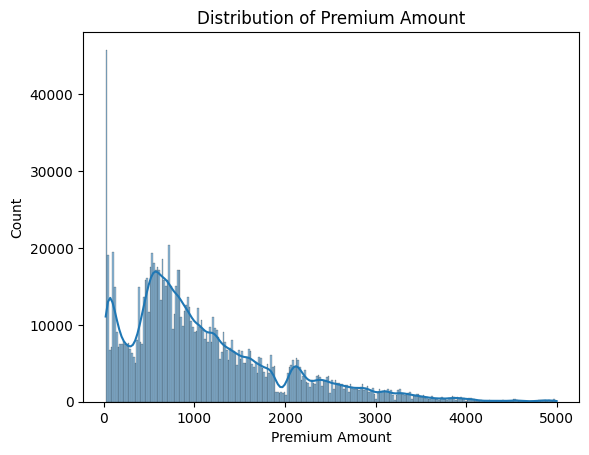

In [45]:
sns.histplot(data['Premium Amount'], kde=True)
plt.title("Distribution of Premium Amount")
plt.show()

<Axes: xlabel='Premium Amount', ylabel='Density'>

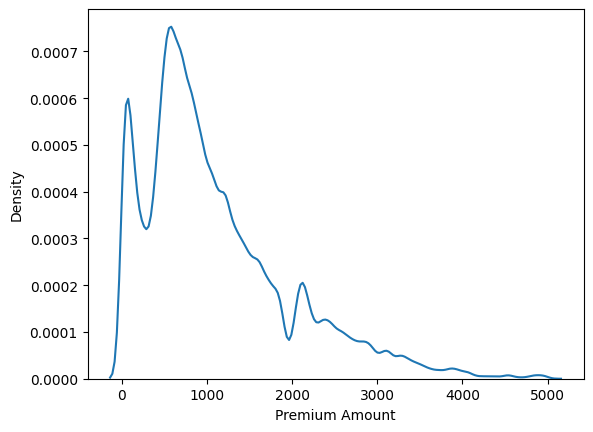

In [46]:
sns.kdeplot(data['Premium Amount'])

Features vs Target

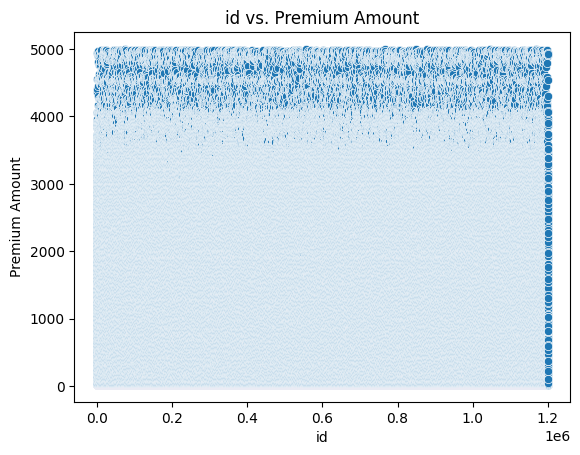

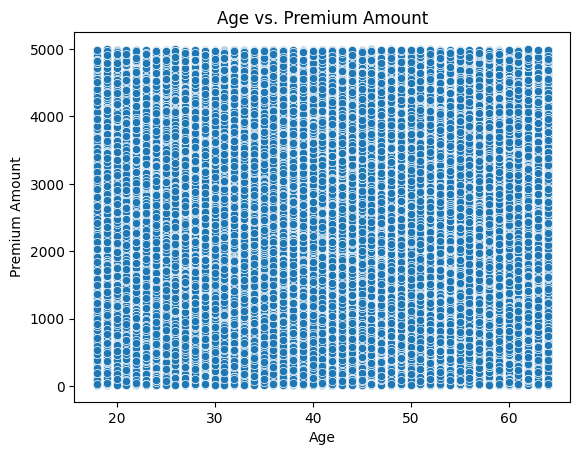

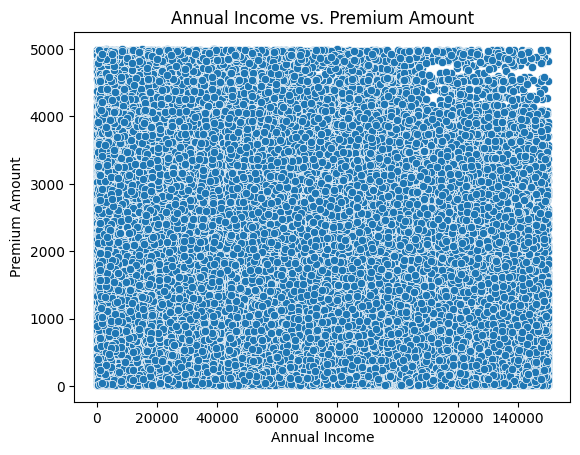

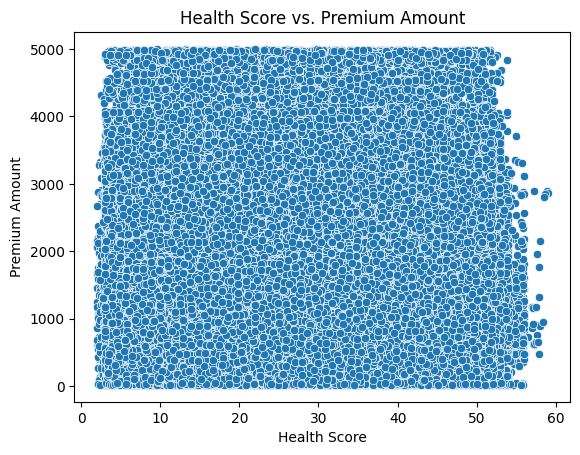

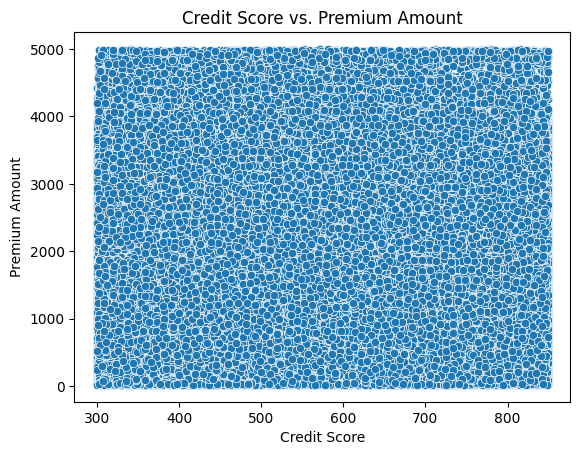

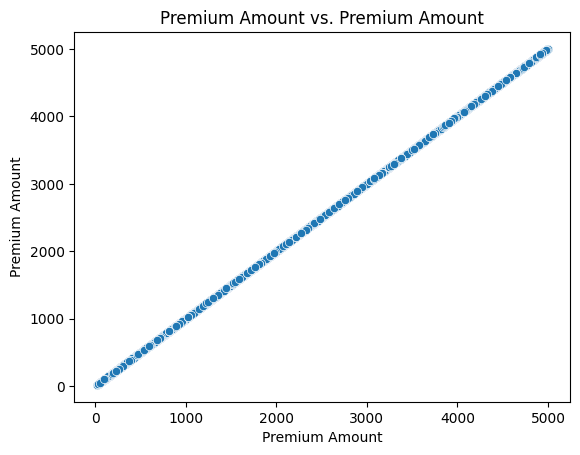

In [47]:
for feature in numerical_features:
    sns.scatterplot(x=data[feature], y=data['Premium Amount'])
    plt.title(f"{feature} vs. Premium Amount")
    plt.show()

In [ ]:
# Plot pairwise relationships
sns.pairplot(data[numerical_features])
plt.suptitle("Pairwise Relationships")
plt.show()